<a href="https://colab.research.google.com/github/A-Peoples/DSRP_Project/blob/main/Data_Science_Project_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Packages**

In [74]:

import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

df = pd.read_csv('/content/500hits.csv',encoding = "latin-1")

In [75]:
#renaming columns for easier use

df = df.rename(columns={"YRS": "Years_Active",
                        "AB": "At_Bat",
                        "R": "Runs",
                        "H": "Hits",
                        "2B": "Doubles",
                        "3B": "Triples",
                        "HR": "Home_Runs",
                        "RBI": "Runs_Batted",
                        "BB": 'Base_on_Balls',
                        "SO": "Strikeouts",
                        "SB": 'Bases_Stolen',
                        "CS": "Caught_Stealing",
                        "BA": 'Batting_Avg'})

In [76]:
#seperating Hall Of Fame (HOF) from Non-HOF players.

hof_df = df.loc[df['HOF'] == 1]
no_hof_df = df.loc[df['HOF'] == 0]

In [77]:
#creating a batting average dataset

strike_df  = df.sort_values(by="Strikeouts", ascending=False)
strike_df['Batting_Avg'] = (strike_df['Hits'] / strike_df['At_Bat'])


In [78]:
#creating a clear rate for filtering

x = strike_df.describe()

x = x.head(7).tail(1)
x['PLAYER'] = "75%"
standard_df = pd.concat([strike_df, x])

standard_df.tail(1)

,PLAYER,Years_Active,G,At_Bat,Runs,Hits,Doubles,Triples,Home_Runs,Runs_Batted,Base_on_Balls,Strikeouts,Bases_Stolen,Caught_Stealing,Batting_Avg,HOF
75%,75%,19.0,2247.0,8180.0,1296.0,2375.0,436.0,107.0,292.0,1206.0,955.0,1226.0,285.0,84.0,0.300231,1.0


In [79]:
Doubles = standard_df.loc[standard_df['Doubles'] > x['Doubles'].iloc[0]].HOF.mean()
Triples = standard_df.loc[standard_df['Triples'] > x['Triples'].iloc[0]].HOF.mean()
Home_Runs = standard_df.loc[standard_df['Home_Runs'] > x['Home_Runs'].iloc[0]].HOF.mean()

Base_on_Balls = standard_df.loc[standard_df['Base_on_Balls'] > x['Base_on_Balls'].iloc[0]].HOF.mean()
Runs_Batted = standard_df.loc[standard_df['Runs_Batted'] > x['Runs_Batted'].iloc[0]].HOF.mean()
Bases_Stolen = standard_df.loc[standard_df['Bases_Stolen'] > x['Bases_Stolen'].iloc[0]].HOF.mean()
Caught_Stealing = standard_df.loc[standard_df['Caught_Stealing'] > x['Caught_Stealing'].iloc[0]].HOF.mean()
Strikeouts = standard_df.loc[standard_df['Strikeouts'] > x['Strikeouts'].iloc[0]].HOF.mean()

In [80]:
df.shape

(465, 16)

Text(0.5, 1.0, 'Amount of Hall of Famers for Years in the MLB')

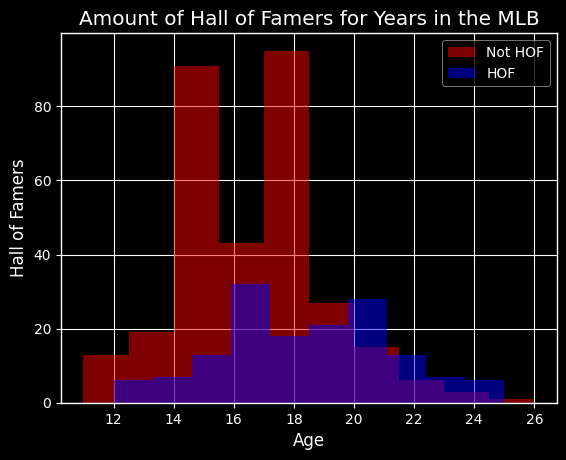

In [81]:
plt.style.use('dark_background')

plt.hist(no_hof_df['Years_Active'], alpha=0.5, label='HOF', color='red')
plt.hist(hof_df['Years_Active'], alpha=0.5, label='HOF', color='blue')

plt.legend(["Not HOF", "HOF"])
plt.xlabel("Age")
plt.ylabel('Hall of Famers')
plt.title("Amount of Hall of Famers for Years in the MLB")

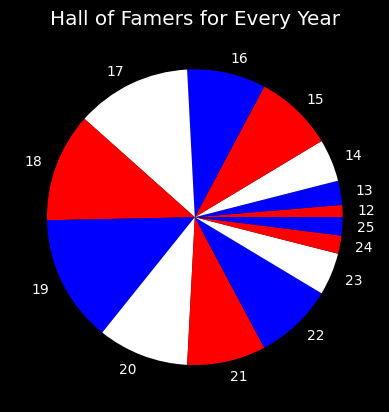

In [82]:
pie_df = hof_df.groupby(['Years_Active']).agg({'HOF': "sum"}).reset_index()
plt.pie(pie_df['HOF'], labels=pie_df['Years_Active'], colors=['red', 'blue', 'white'])
plt.style.use('dark_background')
plt.title('Hall of Famers for Every Year')
plt.show()

In [97]:
pie_df = df.groupby(['Years_Active']).agg({'HOF': ['count', "mean"]}).reset_index()

pie_df.columns = list(map("_".join, pie_df.columns))

pie_df = pie_df.rename(columns={"Years_Active_": 'Years_Active',
                                'HOF_mean': 'HOF_Succ%'})

In [98]:
pie_df

,Years_Active,HOF_count,HOF_Succ%
0,11,3,0.000000
1,12,12,0.166667
2,13,23,0.173913
3,14,43,0.162791
4,15,68,0.191176
5,16,56,0.232143
6,17,76,0.250000
7,18,56,0.321429
8,19,48,0.437500
9,20,26,0.576923


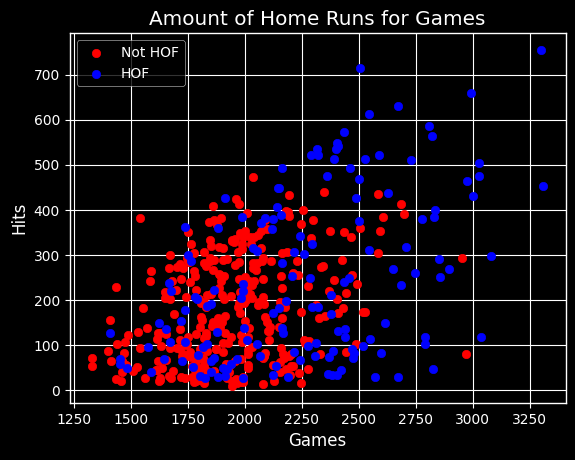

In [84]:
plt.scatter(no_hof_df['G'], no_hof_df['Home_Runs'], color='red')
plt.xlabel('Games')
plt.ylabel('Hits')
plt.title('Amount of Hits for Games')
plt.style.use('dark_background')
plt.scatter(hof_df['G'], hof_df['Home_Runs'], color='blue')
plt.xlabel('Games')
plt.ylabel('Hits')
plt.title('Amount of Home Runs for Games')

plt.legend(["Not HOF", "HOF"])

Text(0.5, 1.0, 'Hall of Fame Percentage for Major Stats')

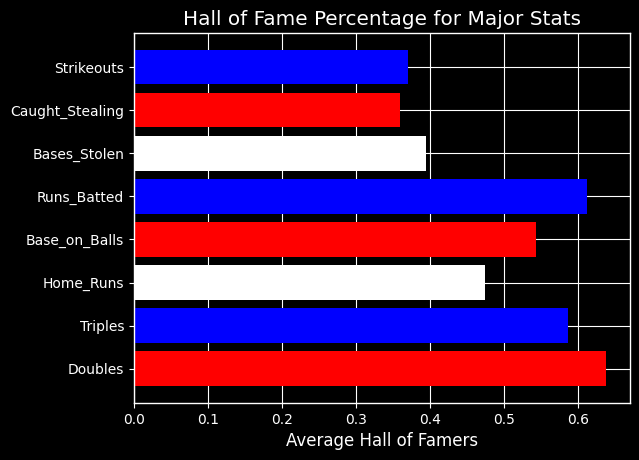

In [85]:
cols = ['Doubles', 'Triples', 'Home_Runs', 'Base_on_Balls', 'Runs_Batted', 'Bases_Stolen', 'Caught_Stealing', 'Strikeouts']
plt.style.use('dark_background')
num_list = []
for col in cols:
  y = standard_df.loc[standard_df[col] > x[col].iloc[0]].HOF.mean()
  num_list.append(y)

nums = {cols[0]: num_list[0],
 cols[1]: num_list[1],
 cols[2]: num_list[2],
 cols[3]: num_list[3],
 cols[4]: num_list[4],
 cols[5]: num_list[5],
 cols[6]: num_list[6],
 cols[7]: num_list[7],}

plt.barh(cols, num_list, color=['red', 'blue', 'white'])
plt.xlabel("Average Hall of Famers")
plt.title("Hall of Fame Percentage for Major Stats")

In [86]:
avg_df = df

avg_df = avg_df.rename(columns={"YRS": "Years_Active",
                        "AB": "At_Bat",
                        "R": "Runs",
                        "H": "Hits",
                        "2B": "Doubles",
                        "3B": "Triples",
                        "HR": "Home_Runs",
                        "RBI": "Runs_Batted",
                        "BB": 'Base_on_Balls',
                        "SO": "Strikeouts",
                        "SB": 'Bases_Stolen',
                        "CS": "Caught_Stealing",
                        "BA": 'Batting_Avg'})

for col in cols:
  avg_df[col] = avg_df[col] / avg_df['G']
cols = ['Doubles', 'Triples', 'Home_Runs', 'Base_on_Balls', 'Runs_Batted', 'Bases_Stolen', 'Caught_Stealing', 'Strikeouts']

avg_df.head()

x = avg_df.describe()

x = x.head(6).tail(1)
x['PLAYER'] = "50%"

for col in cols:
  f = avg_df.loc[avg_df[col] > x[col].iloc[0]].HOF.mean()
  num_list.append(f)
nums = {cols[0]: num_list[0],
  cols[1]: num_list[1],
  cols[2]: num_list[2],
  cols[3]: num_list[3],
  cols[4]: num_list[4],
  cols[5]: num_list[5],
  cols[6]: num_list[6],
  cols[7]: num_list[7],}



Text(0.5, 1.0, 'Hall of Fame Percentage for Major Stats Divided by Games')

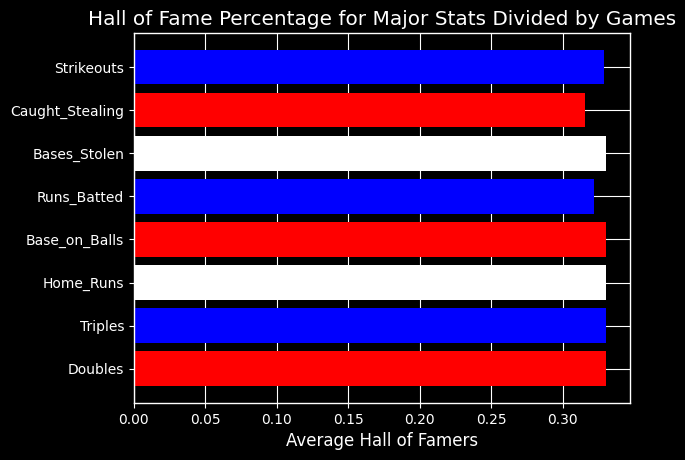

In [87]:
avg_df = df

avg_df = avg_df.rename(columns={"YRS": "Years_Active",
                        "AB": "At_Bat",
                        "R": "Runs",
                        "H": "Hits",
                        "2B": "Doubles",
                        "3B": "Triples",
                        "HR": "Home_Runs",
                        "RBI": "Runs_Batted",
                        "BB": 'Base_on_Balls',
                        "SO": "Strikeouts",
                        "SB": 'Bases_Stolen',
                        "CS": "Caught_Stealing",
                        "BA": 'Batting_Avg'})
for col in cols:
  avg_df[col] = avg_df[col] / avg_df['At_Bat']

x = avg_df.describe()

x = x.head(7).tail(1)
x['PLAYER'] = "75%"

num_list = []
for col in cols:
  y = standard_df.loc[standard_df[col] > x[col].iloc[0]].HOF.mean()
  num_list.append(y)

nums = {cols[0]: num_list[0],
 cols[1]: num_list[1],
 cols[2]: num_list[2],
 cols[3]: num_list[3],
 cols[4]: num_list[4],
 cols[5]: num_list[5],
 cols[6]: num_list[6],
 cols[7]: num_list[7],}

plt.barh(cols, num_list, color=['red', 'blue', 'white'])
plt.xlabel("Average Hall of Famers")
plt.title("Hall of Fame Percentage for Major Stats Divided by Games")